In [1]:
import numpy as np
import matplotlib.pyplot as plt
import eboss_qso.measurements as eboss

In [2]:
from matplotlib.pyplot import rc
import matplotlib.font_manager
rc('font',**{'size':'22','family':'serif','serif':['CMU serif']})
rc('mathtext', **{'fontset':'cm'})
rc('text', usetex=True)
rc('legend',**{'fontsize':'18'})
matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['legend.fontsize'] = 15
#matplotlib.rcParams['legend.title_fontsize'] = 25
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['xtick.minor.size'] = 2.5
matplotlib.rcParams['ytick.minor.size'] = 2.5
matplotlib.rcParams['xtick.major.width'] = 1.5
matplotlib.rcParams['ytick.major.width'] = 1.5
matplotlib.rcParams['xtick.minor.width'] = 1.5
matplotlib.rcParams['ytick.minor.width'] = 1.5
matplotlib.rcParams['axes.titlesize'] = 30
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [3]:
data_N = eboss.read_data('N', 'dr16')
data_S = eboss.read_data('S', 'dr16')

eboss.finalize_data(data_N, eboss.fidcosmo, 'dr16', P0_FKP=3e4)
eboss.finalize_data(data_S, eboss.fidcosmo, 'dr16', P0_FKP=3e4)

In [4]:
z = np.linspace(0.8, 2.2, 50)

w0 = eboss.bias_weight(data_N['Z'], eboss.fidcosmo)
w10 = eboss.fnl_weight(data_N['Z'], p=1.0)
w16 = eboss.fnl_weight(data_N['Z'], p=1.6)
w30 = eboss.fnl_weight(data_N['Z'], p=3.0)

wfkp = data_N['FKPWeight']

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


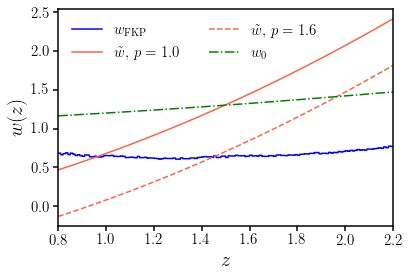

In [5]:
sort = np.argsort(data_N['Z'].compute())
z = data_N['Z'].compute()[sort]

plt.plot(z, wfkp.compute()[sort], color="blue", label="$w_{\\rm FKP}$")

plt.plot(z, w10.compute()[sort], color="tomato", linestyle="solid", 
         label="$\\tilde{w}, \, p=1.0$")
plt.plot(z, w16.compute()[sort], color="tomato", linestyle="dashed", 
         label="$\\tilde{w}, \, p=1.6$")
#plt.plot(z, w30.compute()[sort], color="red", linestyle="dotted", 
#         label="$\\tilde{w}, \, p=3.0$")
plt.plot(z, w0.compute()[sort], color="green", linestyle="dashdot", label="$w_0$")


plt.xlabel("$z$")
plt.ylabel("$w(z)$")
plt.xlim(0.8,2.2)
plt.legend(ncol=2, frameon=False)

#plt.tight_layout()
plt.savefig("figures/weights.pdf", bbox_inches='tight')
plt.show()

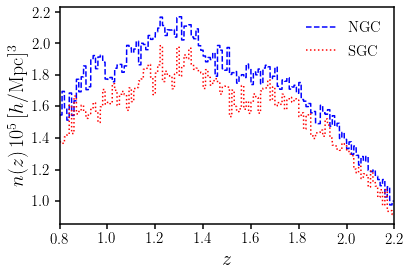

In [6]:
sort_N = np.argsort(data_N['Z'].compute())
z_N = data_N['Z'].compute()[sort_N]

sort_S = np.argsort(data_S['Z'].compute())
z_S = data_S['Z'].compute()[sort_S]

plt.plot(z_N, data_N['NZ'].compute()[sort_N] * 1e5, label="NGC", 
         color="blue",
         linestyle="dashed")
plt.plot(z_S, data_S['NZ'].compute()[sort_S] * 1e5, label="SGC", 
         color="red",
         linestyle="dotted")

plt.legend(frameon=False)
plt.xlabel("$z$")
plt.ylabel("$n(z) \, 10^5 \, [h/{\\rm Mpc}]^3$")
plt.xlim(0.8,2.2)

#plt.tight_layout()
#plt.savefig("figures/nz.pdf", bbox_inches='tight')
plt.show()

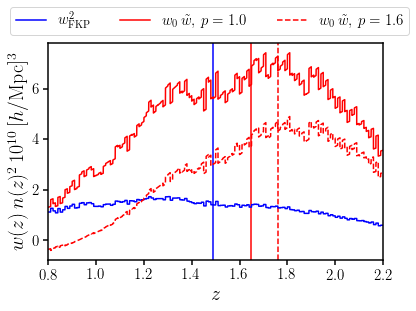

In [7]:
sort = np.argsort(data_N['Z'].compute())
z = data_N['Z'].compute()[sort]

plt.axvline(1.49, color='blue')
plt.axvline(1.65, color='red')
plt.axvline(1.76, color='red', linestyle='dashed')

plt.plot(z, (data_N['NZ']**2).compute()[sort] * (wfkp**2).compute()[sort]  * 1e10, color="blue", label="$w_{\\rm FKP}^2$")

plt.plot(z, (data_N['NZ']**2).compute()[sort] * w10.compute()[sort] * w0.compute()[sort]  * 1e10, color="red", linestyle="solid", 
         label="$w_0 \, \\tilde{w}, \, p=1.0$")
plt.plot(z, (data_N['NZ']**2).compute()[sort] * w16.compute()[sort] * w0.compute()[sort]  * 1e10, color="red", linestyle="dashed", 
         label="$w_0 \, \\tilde{w}, \, p=1.6$")

plt.xlabel("$z$")
plt.ylabel("$w(z) \, n(z)^2 \, 10^{10} \, [h/{\\rm Mpc}]^3$")
plt.xlim(0.8,2.2)
plt.legend(ncol=3, bbox_to_anchor=(1.1,1.2))


plt.savefig("figures/weighted_nz_zeff.pdf", bbox_inches='tight')
plt.show()

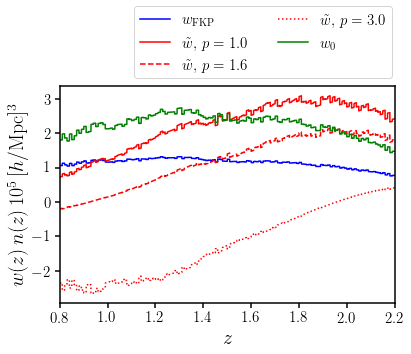

In [8]:
sort = np.argsort(data_N['Z'].compute())
z = data_N['Z'].compute()[sort]

plt.plot(z, data_N['NZ'].compute()[sort] * wfkp.compute()[sort]  * 1e5, color="blue", label="$w_{\\rm FKP}$")

plt.plot(z, data_N['NZ'].compute()[sort] * w10.compute()[sort]  * 1e5, color="red", linestyle="solid", 
         label="$\\tilde{w}, \, p=1.0$")
plt.plot(z, data_N['NZ'].compute()[sort] * w16.compute()[sort]  * 1e5, color="red", linestyle="dashed", 
         label="$\\tilde{w}, \, p=1.6$")
plt.plot(z, data_N['NZ'].compute()[sort] * w30.compute()[sort]  * 1e5, color="red", linestyle="dotted", 
         label="$\\tilde{w}, \, p=3.0$")
plt.plot(z, data_N['NZ'].compute()[sort] * w0.compute()[sort]  * 1e5, color="green", label="$w_0$")


plt.xlabel("$z$")
plt.ylabel("$w(z) \, n(z) \, 10^5 \, [h/{\\rm Mpc}]^3$")
plt.xlim(0.8,2.2)
plt.legend(ncol=2, bbox_to_anchor=(0.2,1))

plt.show()

## Model components
Best fit of the NGC mean mock for (optimal weights p=1.0), to show the different cmponent of the model.

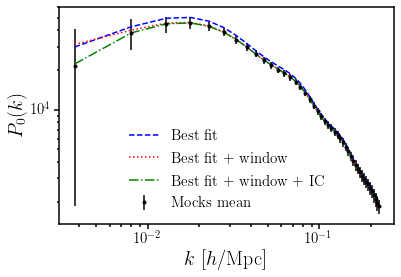

In [9]:
k, data = np.loadtxt("fits/input/data/spectra/NGC/1.0-ezmock/Pk_data.dat", unpack=True)
cov = np.diagonal(np.loadtxt("fits/input/data/spectra/NGC/1.0-ezmock/covariance.dat"))

k_un, Pk_un = np.loadtxt("bestfit_Pk/Pk_N_p1p0_lin_weights_ezmocks.txt", unpack=True)
k_w, Pk_w = np.loadtxt("bestfit_Pk/Pk_N_p1p0_lin_weights_window_ezmocks.txt", unpack=True)
k_ic, Pk_ic = np.loadtxt("bestfit_Pk/Pk_N_p1p0_lin_weights_RIC_ezmocks.txt", unpack=True)
    
plt.errorbar(k, data, yerr=np.sqrt(cov), ls='none', marker='.', label="Mocks mean", color="k")
plt.loglog(k_un, Pk_un, linestyle = 'dashed', label="Best fit", color="blue")
plt.loglog(k_w, Pk_w, linestyle = 'dotted', label="Best fit + window", color="red")
plt.loglog(k_ic, Pk_ic, linestyle = 'dashdot', label="Best fit + window + IC", color="green")
    
plt.legend(loc=8,frameon=False)
plt.xlabel('$k$ [$h$/Mpc]')
plt.ylabel('$P_0(k)$')

plt.savefig("figures/model_components.pdf", bbox_inches='tight')    
plt.show()

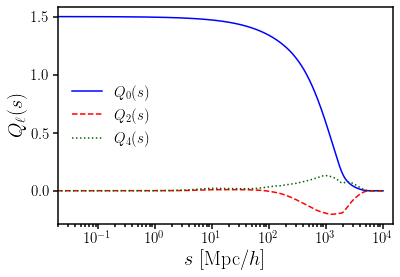

In [10]:
kpoles = np.loadtxt('fits/input/data/window/dr16/subsample_mean/poles_dr16-QSO-N-p_1.6.dat')

plt.semilogx(kpoles[:,0], kpoles[:,1], label="$Q_0(s)$", color='blue')
plt.semilogx(kpoles[:,0], kpoles[:,2], label="$Q_2(s)$", color='red', linestyle='dashed')
plt.semilogx(kpoles[:,0], kpoles[:,3], label="$Q_4(s)$", color='darkgreen', linestyle='dotted')

plt.legend(frameon=False)
plt.xlabel("$s$ [Mpc/$h$]")
plt.ylabel("$Q_{\\ell}(s)$")
plt.xlim(2e-2,1.5e4)

plt.savefig("figures/Qells.pdf", bbox_inches='tight')